# Molecular Dynamics and Ab Initio Simulations : Developing a Predictive Model for Molecular Energy Configurations


This project involves utilizing results from ab initio molecular dynamics simulations to develop a model capable of predicting the energy associated with specific molecular configurations. It leverages two datasets: the first encompasses simulations on the dynamics of the Zundel ion (H2O-H-H2O), while the second focuses on a Mo2S4 aggregate. Each dataset contains about 10,000 atomic configurations and their corresponding potential energies, providing a comprehensive basis for accurate energy prediction in molecular systems.

## Data details

First, let's try to render a configuration on a 3D plot.

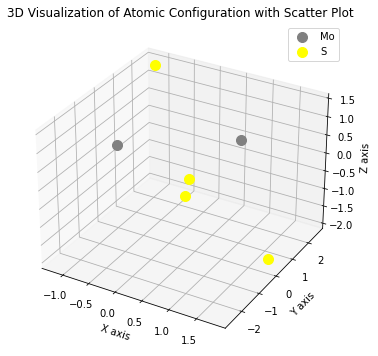

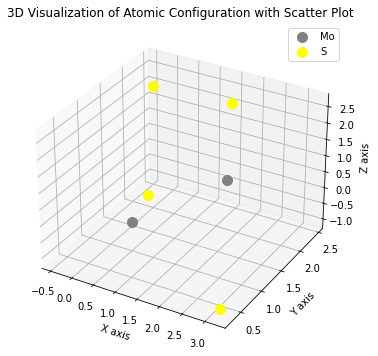

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/TRAJEC_short.xyz'

# Re-reading the file to confirm its structure
with open(file_path, 'r') as file:
    file_content = file.readlines()

# Parsing the first configuration from the file
# Skipping the first two lines (number of atoms and comment) and taking the next six lines for the first configuration

def plot_configuration(first_line, last_line):

    configuration = file_content[first_line:last_line]

    # Extracting atom types and their positions
    atom_types = []
    positions = []

    for line in configuration:
        parts = line.split()
        atom_types.append(parts[0])  # Atom type (Mo or S)
        positions.append([float(parts[1]), float(parts[2]), float(parts[3])])  # x, y, z coordinates

    positions = np.array(positions)

    # Creating a 3D scatter plot using 'o' markers to represent atoms
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plotting each atom with 'o' marker
    for i, atom in enumerate(atom_types):
        x, y, z = positions[i]
        color = 'gray' if atom == 'Mo' else 'yellow'  # Gray for Mo, Yellow for S
        ax.scatter(x, y, z, c=color, marker='o', s=100)  # Adjust size as needed

    # Adding labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Visualization of Atomic Configuration with Scatter Plot')

    # Add legend
    ax.scatter([], [], [], c='gray', marker='o', s=100, label='Mo')
    ax.scatter([], [], [], c='yellow', marker='o', s=100, label='S')
    ax.legend()

    plt.show()

plot_configuration(2,8)
plot_configuration(40154,40160)

We notice that the configurations are quite different.

Properties of ``TRAJEC_short.xyz`` :
- 11,001 configurations (88,008 lines/8 lines per configuration).
- No units for positions, but it can be assumed that they are in Angstroms ($\AA = 10^-{10}m$).

It is quickly noticed that there are 11,001 lines in the ``energies.out`` file, and the same in the ``potential-energy`` file. It seems that the values in ``potential-energy.txt`` correspond to those in ``energies.out``. We can then verify this:

In [20]:
energies_out = pd.read_csv("data/energies.out", delim_whitespace=True)
energies_out.head()

,step,none,temp,potential_energy,none.1,none.2,none.3,none.4
0,1,0.00000000,1278.492,-176.957259,-176.893668,0.0,0.000062,1.31
1,5,0.00000000,8620.471,-176.992785,-175.702624,0.0,0.036543,1.56
2,10,0.00000000,954.638,-176.996302,-175.624659,0.0,0.095147,0.84
3,15,0.00000000,319.990,-176.997355,-175.621132,0.0,0.121177,1.05
4,20,0.00000000,273.078,-177.004502,-175.619745,0.0,0.137373,1.32


In [22]:
potential_energy = pd.read_csv('data/potential-energy.txt', delim_whitespace=True, header=None)
potential_energy.columns = ['potential_energy']
potential_energy.head()

,potential_energy
0,-176.957259
1,-176.992785
2,-176.996302
3,-176.997355
4,-177.004502


In [27]:
# On teste si les deux colonnes sont égales
print(energies_out['potential_energy'].equals(potential_energy['potential_energy']))

True



The two columns quickly lead us to assume that the ``energies.out`` file represents the energies of the 11,001 configurations in the ``TRAJEC_short.xyz`` file. We can then simply use the energies.out file to train our model.